# Gaussian Mixture Models

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM

In [30]:
def draw_ellipse(n_class, position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, n_class):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [31]:
def plot_gmm(n_class, gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(n_class, pos, covar, alpha=w * w_factor)

In [32]:
def execute_gmm(n_class):
    gmm = GMM(n_components=n_class, covariance_type='full', random_state=42)
    plot_gmm(n_class, gmm, X)

<IPython.core.display.Javascript object>


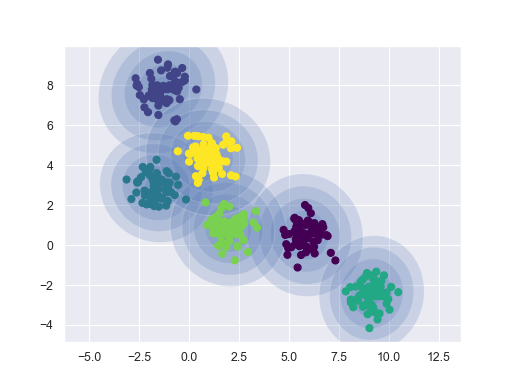

In [34]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=6,
                       cluster_std=0.60, random_state=0)
execute_gmm(6)